# AIPI 590 - XAI | Assignment #03
### Interpretable ML
### Yabei Zeng

#### Link to Colab: https://colab.research.google.com/github/yabeizeng1121/XAI/blob/main/Assignment3/Interpretable_ML.ipynb

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yabeizeng1121/XAI/blob/main/Assignment3/Interpretable_ML.ipynb)


In [1]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "XAI/Assignment3" # Change to your repo name
git_path = 'https://github.com/yabeizeng1121/XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = ''
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'XAI'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 36 (delta 7), reused 34 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 705.07 KiB | 3.89 MiB/s, done.
Resolving deltas: 100% (7/7), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
/content/XAI/Assignment3
requirements.txt  WA_Fn-UseC_-Telco-Customer-Churn.csv


## Prepare the Packages

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import Log
from statsmodels.tools import add_constant
from pygam import LinearGAM, GammaGAM, s, f, LogisticGAM
import seaborn as sns

## Exploratory Data Analysis to check Assumptions

In [39]:
# Data Preprocessing
# Import the dataset
df = pd.read_csv('/content/XAI/Assignment3/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert Churn to binary form
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert 'Churn' to binary
# Convert TotalCharges to be numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)


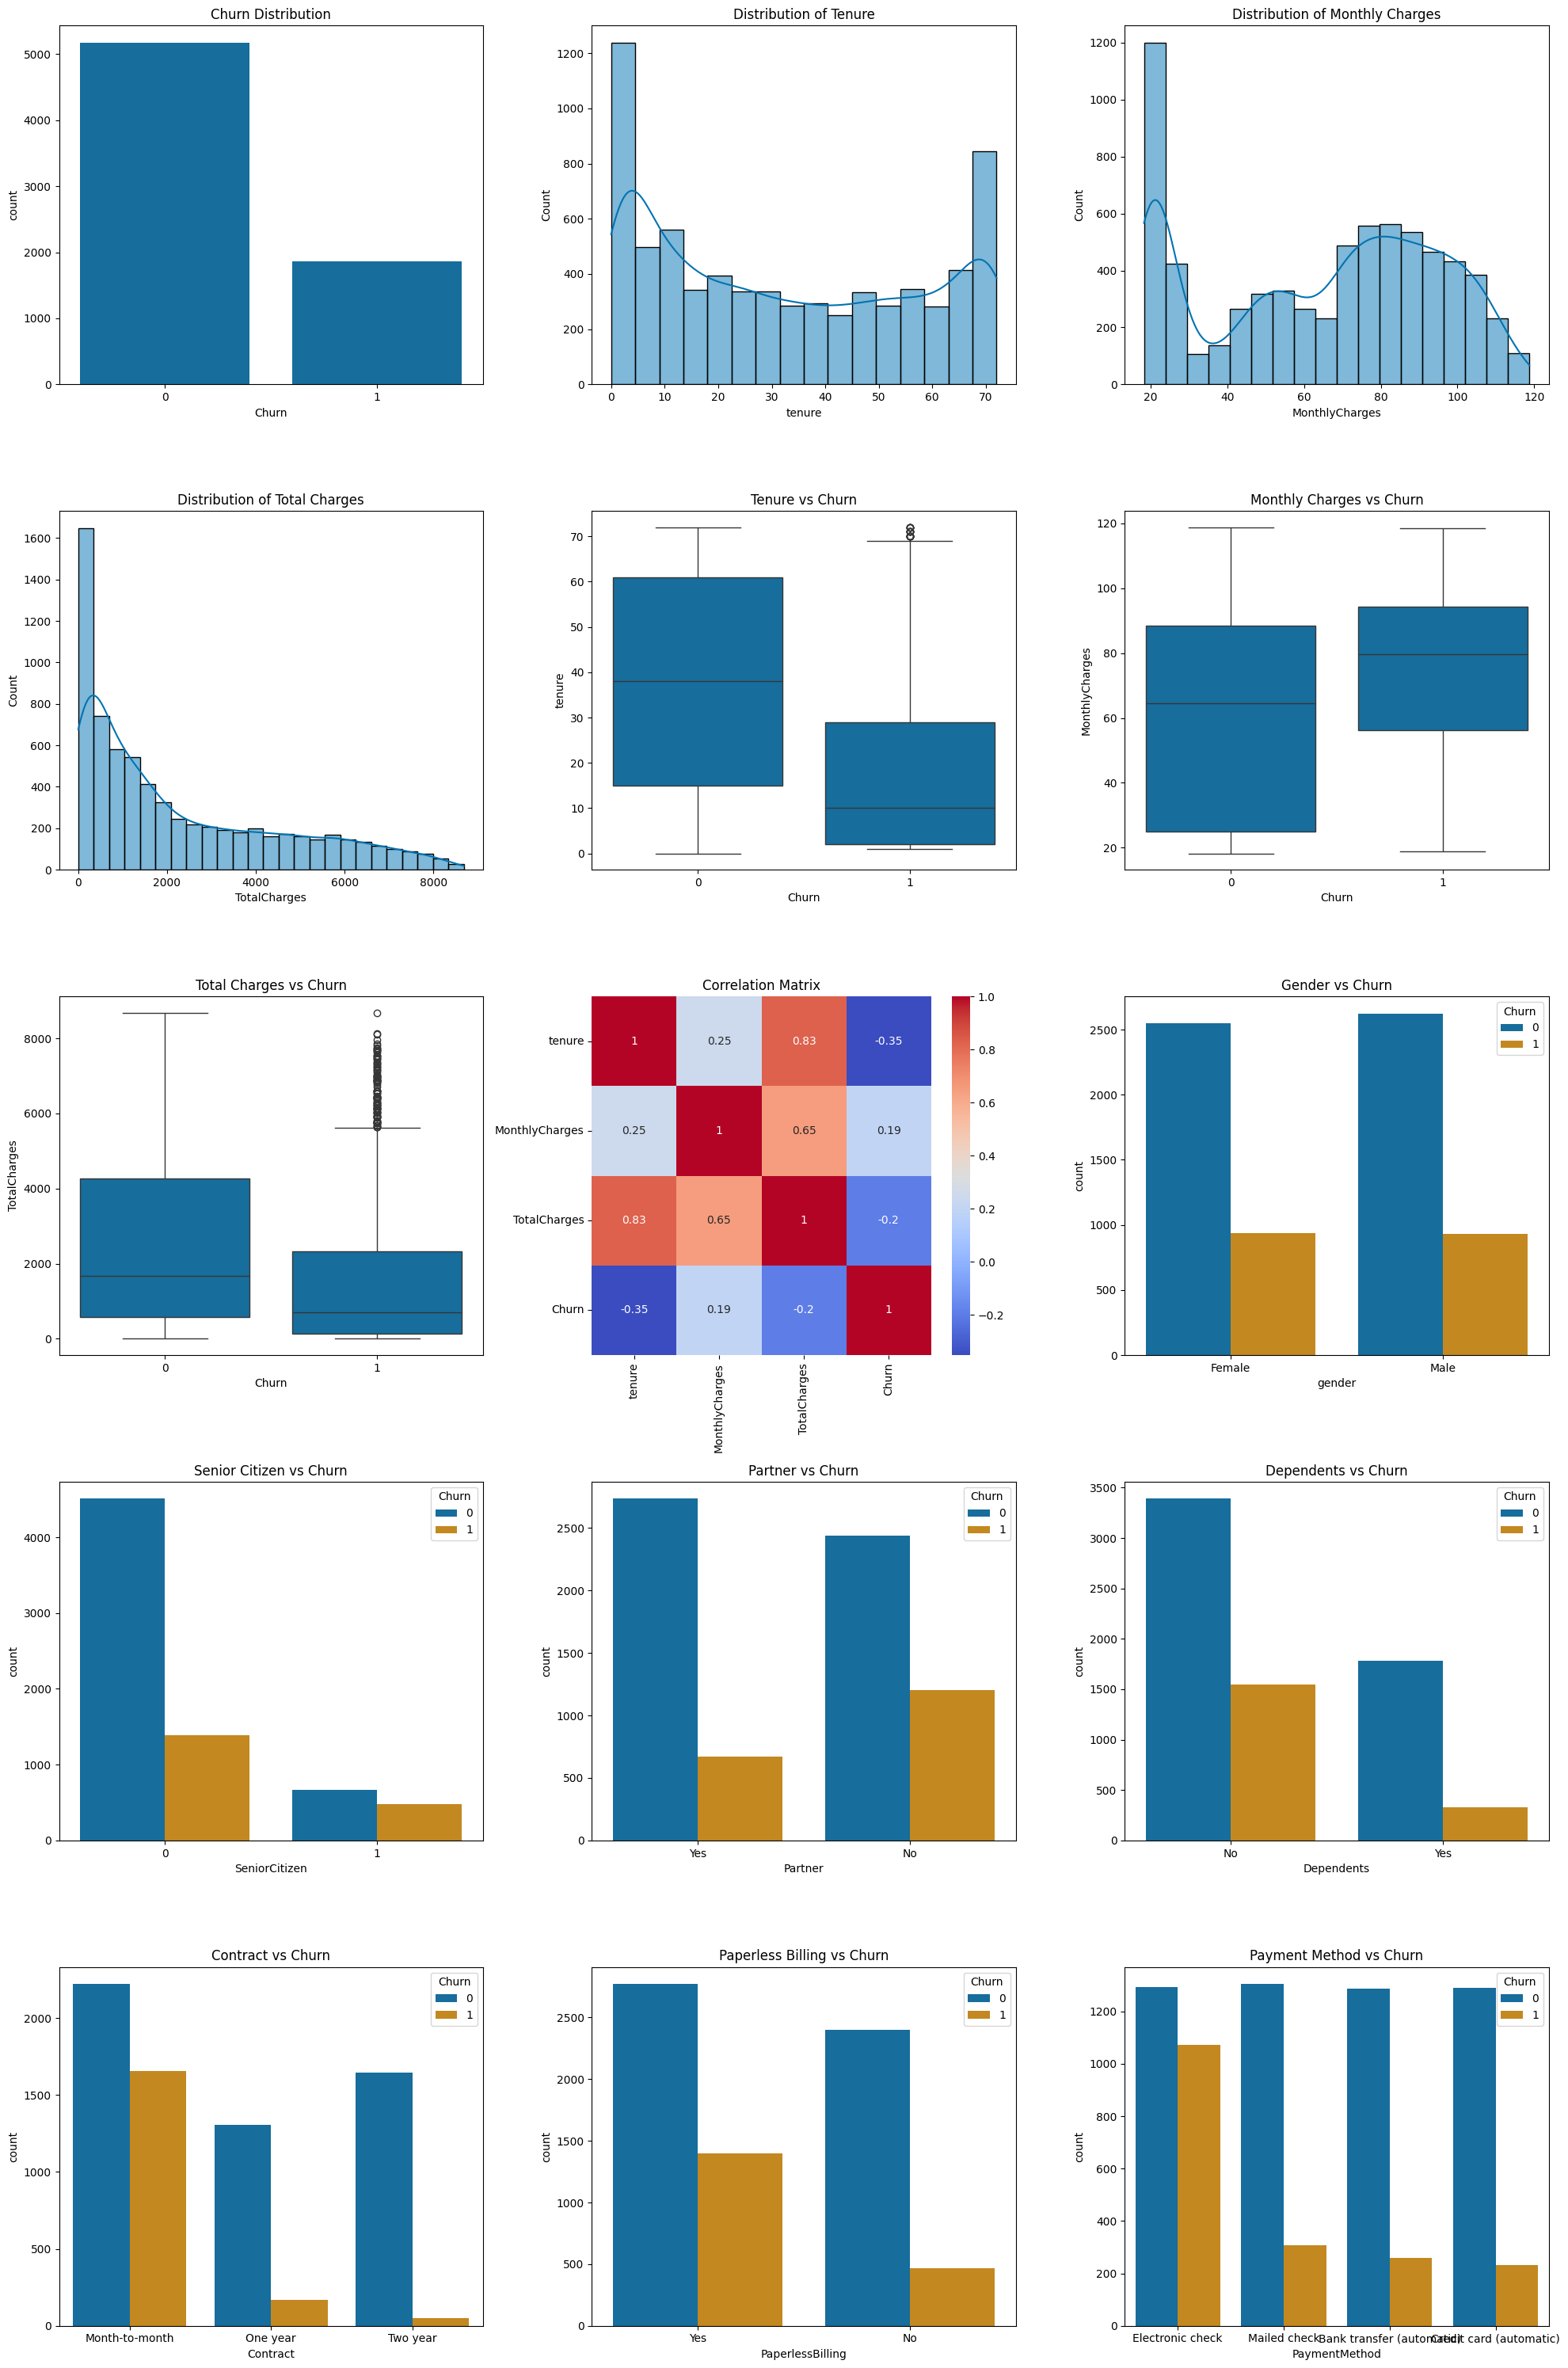

In [24]:
sns.set_palette("colorblind")
# Create a large canvas for all the visualizations (3 rows and 5 columns)
fig, axes = plt.subplots(5, 3, figsize=(20, 30))
fig.subplots_adjust(hspace=0.5)

# 1. Distribution of Target Variable (Churn) (First row, first column)
sns.countplot(x='Churn', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Churn Distribution')

# 2. Distribution of Numerical Features
# Tenure (First row, second column)
sns.histplot(df['tenure'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Tenure')

# Monthly Charges (First row, third column)
sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Monthly Charges')

# Total Charges (First row, fourth column)
sns.histplot(df['TotalCharges'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Total Charges')

# 3. Boxplots for Numeric Features vs Churn (First row, fifth column)
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Tenure vs Churn')

# 4. Monthly Charges vs Churn (Second row, first column)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Monthly Charges vs Churn')

# 5. Total Charges vs Churn (Second row, second column)
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Total Charges vs Churn')

# 6. Correlation Matrix (Second row, third column)
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[2, 1])
axes[2, 1].set_title('Correlation Matrix')

# 7. Categorical Features vs Churn (Second row)
# Gender vs Churn (Second row, fourth column)
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Gender vs Churn')

# Senior Citizen vs Churn (Second row, fifth column)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[3, 0])
axes[3, 0].set_title('Senior Citizen vs Churn')

# 8. Partner vs Churn (Third row, first column)
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[3, 1])
axes[3, 1].set_title('Partner vs Churn')

# 9. Dependents vs Churn (Third row, second column)
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[3, 2])
axes[3, 2].set_title('Dependents vs Churn')

# 10. Contract vs Churn (Third row, third column)
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[4, 0])
axes[4, 0].set_title('Contract vs Churn')

# 11. Paperless Billing vs Churn (Third row, fourth column)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, ax=axes[4, 1])
axes[4, 1].set_title('Paperless Billing vs Churn')

# 12. Payment Method vs Churn (Third row, fifth column)
sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[4, 2])
axes[4, 2].set_title('Payment Method vs Churn')

# Show the large canvas with all plots
plt.tight_layout()
plt.show()

### Analysis for linear regression
- Linearity: The boxplots for `tenure`, `MonthlyCharges`, and `TotalCharges` vs. `Churn` do not display a clearly linear relationship between the features and `Churn`. This might suggest hat a linear regression model may be the best model due to the lack of a strong linear relationship.
- Normality of Residuals: From the histograms, it is evident that the data distribution is not perfectly normal. Skewness in `TotalCharges` and `MonthlyCharges` might cause residuals to deviate from normality.
- Homoscedasticity: The outliers in `TotalCharges` suggest potenial heteroscedasticity, which might violate this assumption.
- Multicollinearity: The correlation heatmap shows weak to moderate correlations between `tenure`, `MonthlyCharges`, and `TotalCharges`. There doesn’t appear to be multicollinearity.

### Analysis for Logistic Regression:
- Linearity of log odds: To verify this assumption, we need to look at how the log odds of `Churn` change with the independent variables. The visualizations show that categorical features (like `Contract`, `Partner`, and `SeniorCitizen`) have a clear impact on `Churn`, but the numeric variables (e.g., `tenure` and `TotalCharges`) might not have a linear relationship with `Churn`. This could lead to problems in fitting a logistic regression model unless transformations (like logarithmic scaling) are applied to numeric variables.

- Multicollinearity: As mentioned earlier, the correlation matrix shows that there is no severe multicollinearity among the features, so this assumption is likely met.

### Analysis for GAMs
- GAMs are more flexible than linear and logistic regression models. Regarding the visualizations that showing the non-linear relationships between the independent and dependent variables. GAMs could be an appropriate model for this dataset.

---

## 2.Linear Regression:
Treat the churn variable as a continuous variable (e.g., 0 for staying, 1 for churning) and build a linear regression model to predict churn. Interpret the coefficients and assess the model's performance.

In [37]:
X = df.drop(columns=['customerID', 'Churn'])  # Drop customerID and Churn from features
X = pd.get_dummies(X, drop_first=True)  # Convert all categorical variables to dummy variables
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict churn on the test set
y_pred = lin_reg.predict(X_test)

# Assess the model's performance
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared}")

# Coefficients interpretation
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lin_reg.coef_})
print(coefficients)

Mean Squared Error (MSE): 0.13413467815056088
R-squared: 0.3108806091343702
                                  Feature  Coefficient
0                           SeniorCitizen     0.037677
1                                  tenure    -0.001927
2                          MonthlyCharges    -0.004478
3                            TotalCharges    -0.000042
4                             gender_Male    -0.008574
5                             Partner_Yes     0.007008
6                          Dependents_Yes    -0.023307
7                        PhoneService_Yes     0.026879
8          MultipleLines_No phone service    -0.026879
9                       MultipleLines_Yes     0.071307
10            InternetService_Fiber optic     0.281641
11                     InternetService_No    -0.036516
12     OnlineSecurity_No internet service    -0.036516
13                     OnlineSecurity_Yes    -0.035131
14       OnlineBackup_No internet service    -0.036516
15                       OnlineBackup_Yes   

---
## 3. Logistic Regression:
Treat churn as a binary variable and build a logistic regression model to predict the probability of churn. Interpret the coefficients.

In [41]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence issues
log_reg.fit(X_train, y_train)

# Predict churn on the test set
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the churn class (1)

# Assess the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Coefficients interpretation
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
print("\nLogistic Regression Coefficients:")
print(coefficients)

Accuracy: 0.8183108587650816

Confusion Matrix:
[[935 101]
 [155 218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Logistic Regression Coefficients:
                                  Feature  Coefficient
0                           SeniorCitizen     0.223685
1                                  tenure    -0.061759
2                          MonthlyCharges     0.004761
3                            TotalCharges     0.000306
4                             gender_Male    -0.045691
5                             Partner_Yes     0.104940
6                          Dependents_Yes    -0.154557
7                        PhoneService_Yes    -0.448628
8          MultipleLines_No phone service     0.

---

## 4. Generalized Additive Model (GAM):
Build a GAM to model the non-linear relationships between customer features and churn. Interpret the GAM model.

In [52]:
gam = LogisticGAM(s(1) + s(2) + s(3) +
    f(0) + f(4) + f(5) + f(6) + f(7) + f(8) + f(9) +
    f(10) + f(11) + f(12) + f(13) + f(14) + f(15) +
    f(16) + f(17) + f(18) + f(19) + f(20) + f(21) +
    f(22) + f(23) + f(24) + f(25) + f(26) + f(27) +
    f(28) + f(29)).fit(X_train, y_train)
y_pred = gam.predict(X_test)
y_prob = gam.predict_proba(X_test)

# Model evaluation: accuracy
accuracy = (y_pred == y_test).mean()
print(f'GAM Accuracy: {accuracy}')

# Coefficients for the categorical variables (use factor indexing)
print("GAM Coefficients for Categorical Features:")
for i in range(3, 11):
    print(f'Feature {i}: {gam.coef_[i]}')

GAM Accuracy: 0.8147622427253371
GAM Coefficients for Categorical Features:
Feature 3: 0.4172302093748608
Feature 4: 0.280179942556301
Feature 5: 0.06122757836762269
Feature 6: -0.09188498403613107
Feature 7: -0.3667060740325499
Feature 8: -0.687013039243387
Feature 9: -0.4837425921424816
Feature 10: 0.04832245073077098


---

## 5. Model Comparison:
Compare the performance and interpretability of the different models you built. Discuss the strengths and weaknesses of each approach and provide recommendations for which model(s) the telecommunications company should use to address their customer churn problem.


### Analysis on the results of the model
**1. Linear Regression Model**
- Performance:
  - MSE: 0.134, R-squared: 0.31 (explains 31% of the variance).
- Strengths:
  - Simple, interpretable coefficients.
- Weaknesses:
  - Poor fit for non-linear relationships, low R-squared.

**2. Logistic Regression Model**
- Performance:
  - Accuracy: 81.8%, Confusion Matrix: [[935, 101], [155, 218]].
Precision for churners (1): 68%, Recall: 58%.
- Strengths:
  - Clear interpretability via log-odds coefficients (e.g., InternetService_Fiber optic: 0.55).
  - Better at binary classification than linear regression.
- Weaknesses:
  - Assumes linear relationships in log-odds.

**3. GAM**
- Performance:
  - Accuracy: 81.5% (comparable to logistic regression).
- Strengths:
  - Captures non-linear relationships, more flexible.
- Weaknesses:
  - Less interpretable due to non-linear splines.
More computationally complex.

### Conclusion:
Based on the performance, strengths, and weaknesses of the three models, Logitsic model is better choice for it has the highest accuracy and easy for interpretability. Though GAM has comparable accuracy to logistic model, GAM is more complex and there might be potential issues for overfitting. Therefore, based on the performance and goal for easy interpretability, Logistic regression model can be used by telecommunications company to address their customer churn problem.
